In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.9.0


https://www.tensorflow.org/tutorials/keras/basic_classification

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

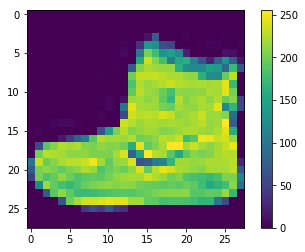

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

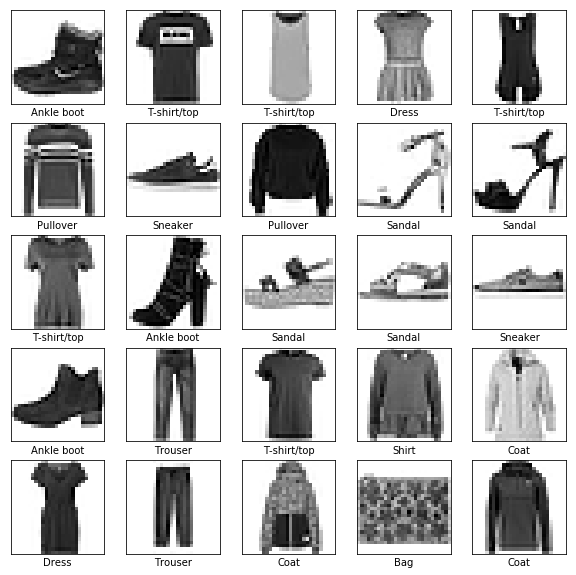

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.4996 - acc: 0.8254
Epoch 2/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.3727 - acc: 0.8649
Epoch 3/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.3360 - acc: 0.8771
Epoch 4/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.3117 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.2921 - acc: 0.8921


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 20us/step
Test accuracy: 0.8769


In [16]:
predictions = model.predict(test_images)

In [17]:
predictions[0]

array([  5.05558546e-06,   3.14335153e-07,   9.87926342e-07,
         3.99407918e-06,   1.50728135e-06,   1.14418278e-02,
         1.83798275e-05,   1.06606171e-01,   1.01325533e-03,
         8.80908489e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

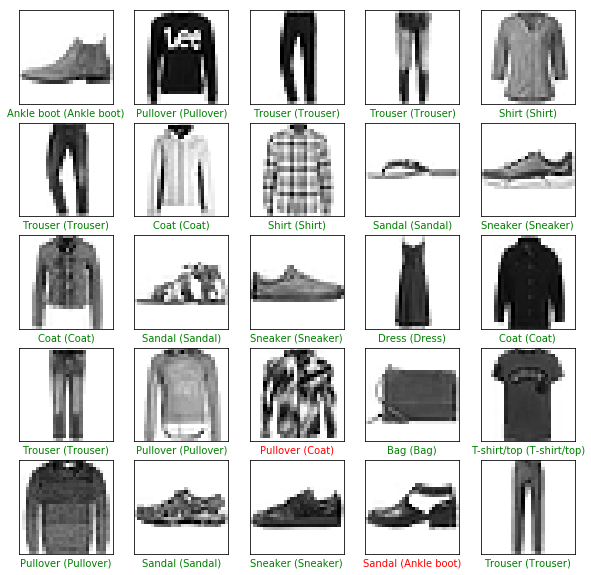

In [19]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)

In [20]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [21]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [22]:
predictions = model.predict(img)

print(predictions)

[[  5.05558046e-06   3.14335153e-07   9.87925318e-07   3.99408691e-06
    1.50727999e-06   1.14418222e-02   1.83797911e-05   1.06606200e-01
    1.01325288e-03   8.80908489e-01]]


In [23]:
prediction = predictions[0]

np.argmax(prediction)

9